In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
import os
for dirname, _, filenames in os.walk('C:/Users/rajyasri/Downloads/Sample_SensorVariation.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/Sample_SensorVariation.csv', index_col='Date', parse_dates=True)

In [ ]:
data.head()

,index,Actual,sin,Original,Sum,prediction,Noise,Rise_t,Drift,Rise
Date,,,,,,,,,,
2023-05-15,1,0,0.000000,0.000,0.000000,NaN,0.0081,0.0081,0.1,0.1081
2023-05-16,2,15,0.258819,0.002,0.260819,NaN,-0.0010,0.0010,0.1,0.1010
2023-05-17,3,30,0.500000,0.004,0.504000,NaN,0.0068,0.0108,0.1,0.1108
2023-05-18,4,45,0.707107,0.006,0.713107,NaN,-0.0027,0.0033,0.1,0.1033
2023-05-19,5,60,0.866025,0.008,0.874025,NaN,0.0060,0.0140,0.1,0.1140


In [ ]:
print(data.Rise)

Date
2023-05-15    0.1081
2023-05-16    0.1010
2023-05-17    0.1108
2023-05-18    0.1033
2023-05-19    0.1140
               ...  
2024-05-04    4.3099
2024-05-05    4.3052
2024-05-06    4.3042
2024-05-07    4.3258
2024-05-08    4.3129
Name: Rise, Length: 360, dtype: float64


<Axes: xlabel='Date'>

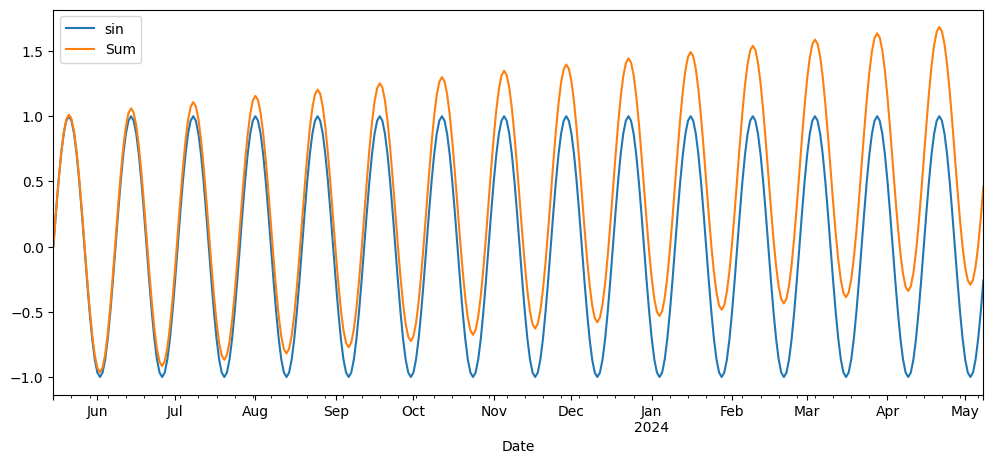

In [ ]:
#sin vs sum with date
data[['sin','Sum']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

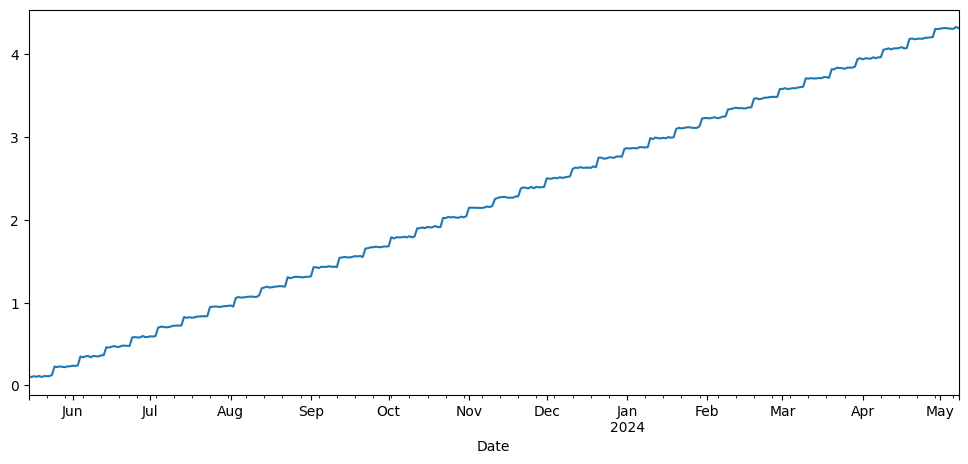

In [ ]:
data['Rise'].plot(figsize=(12,5))

In [ ]:
data=data.drop( ['index','Actual','sin','Original','Sum','Noise','Rise_t','Drift','prediction'], axis=1)
data.head()

,Rise
Date,
2023-05-15,0.1081
2023-05-16,0.1010
2023-05-17,0.1108
2023-05-18,0.1033
2023-05-19,0.1140


In [ ]:
#sum with date
#import seaborn as sns
#sns.lineplot(data=data[['Sum']])
#data['Sum'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data['Rise'])

1. ADF :  0.08048861349588518
2. P-Value :  0.9647034351624151
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 350
5. Critical Values :
	 1% :  -3.4491725955218655
	 5% :  -2.8698334971428574
	 10% :  -2.5711883591836733


In [ ]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(360, 1)
(330, 1) (30, 1)


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train['Rise'],trace=True,suppress_warnings=True, seasonal=True, m=1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1450.175, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1362.483, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1365.854, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1367.767, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1318.744, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1439.680, Time=1.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1457.236, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1448.846, Time=0.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1368.386, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1471.904, Time=3.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1371.457, Time=1.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1494.701, Time=4.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1379.296, Time=1.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1520.795, Time=9.23 sec
 ARIMA(5,1,0)(0,0,0

In [ ]:
model=ARIMA(train['Rise'],order=(5,1,1),trend='t')
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rise   No. Observations:                  330
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 765.731
Date:                Sat, 27 May 2023   AIC                          -1515.463
Time:                        06:37:47   BIC                          -1485.094
Sample:                    05-15-2023   HQIC                         -1503.348
                         - 04-08-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0120   6.32e-05    189.402      0.000       0.012       0.012
ar.L1          0.1738      0.080      2.184      0.029       0.018       0.330
ar.L2         -0.0357      0.117     -0.305      0.760      -0.265       0.193
ar.L3         -0.2137      0.131     -1.626      0.104      -0.471       0.044
ar.L4         -0.0460      0.118     -0.390      0.696      -0.277       0.185
ar.L5         -0.4793      0.084     -5.716      0.000      -0.644      -0.315
ma.L1         -0.9583      0.058    -16.402      0.000      -1.073      -0.844
sigma2         0.0005   5.06e-05     10.370      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.46   Prob(JB):                         0.36
Heteroskedasticity (H):               0.88   Skew:                             0.17
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
print(start)
print(end)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
#pred.plot(legend=True)
#test['Rise'].plot(label='Testset',color='Yellow',figsize=(12, 5),legend=True)

330
359
2024-04-09    4.019248
2024-04-10    4.038070
2024-04-11    4.062463
2024-04-12    4.068490
2024-04-13    4.080114
2024-04-14    4.067430
2024-04-15    4.072549
2024-04-16    4.078609
2024-04-17    4.097937
2024-04-18    4.114167
2024-04-19    4.140018
2024-04-20    4.156240
2024-04-21    4.170047
2024-04-22    4.175503
2024-04-23    4.182695
2024-04-24    4.186834
2024-04-25    4.196891
2024-04-26    4.209256
2024-04-27    4.226386
2024-04-28    4.242306
2024-04-29    4.258543
2024-04-30    4.270919
2024-05-01    4.281544
2024-05-02    4.289708
2024-05-03    4.298896
2024-05-04    4.308750
2024-05-05    4.321140
2024-05-06    4.334680
2024-05-07    4.349321
2024-05-08    4.363048
Freq: D, Name: ARIMA Predictions, dtype: float64


In [ ]:
target_value = 5

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/Sample_SensorVariation.csv')
df.drop(['index','Actual','sin','Original','Sum','Noise','Rise_t','Drift','prediction'],axis=1)
# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get the last date
last_date = df['Date'].iloc[-1]

# Print the last date
print(last_date)

2024-05-08 00:00:00


In [ ]:
# Predict future temperature values
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=200)
forecast=model.predict(start=len(train)+len(test), end=end+200,typ='levels')
#forecast1 = model.forecast(steps=len(future_dates))
# Create a DataFrame with the future dates and predicted temperatures
forecast_df= pd.DataFrame({'Dates': future_dates, 'Rise': forecast})
forecast_df.set_index('Dates', inplace=True)

In [ ]:
forecast_df

,Rise
Dates,
2024-05-09,4.375896
2024-05-10,4.387120
2024-05-11,4.397686
2024-05-12,4.407898
2024-05-13,4.418898
...,...
2024-11-20,6.707990
2024-11-21,6.719965
2024-11-22,6.731940


In [ ]:
forecast_df[forecast_df['Rise']>=target_value].index[0]

Timestamp('2024-07-01 00:00:00')

In [ ]:
a=forecast_df[forecast_df['Rise']>=target_value].index[0]
print("Temperature will reach", target_value ,"on", a)

Temperature will reach 5 on 2024-07-01 00:00:00


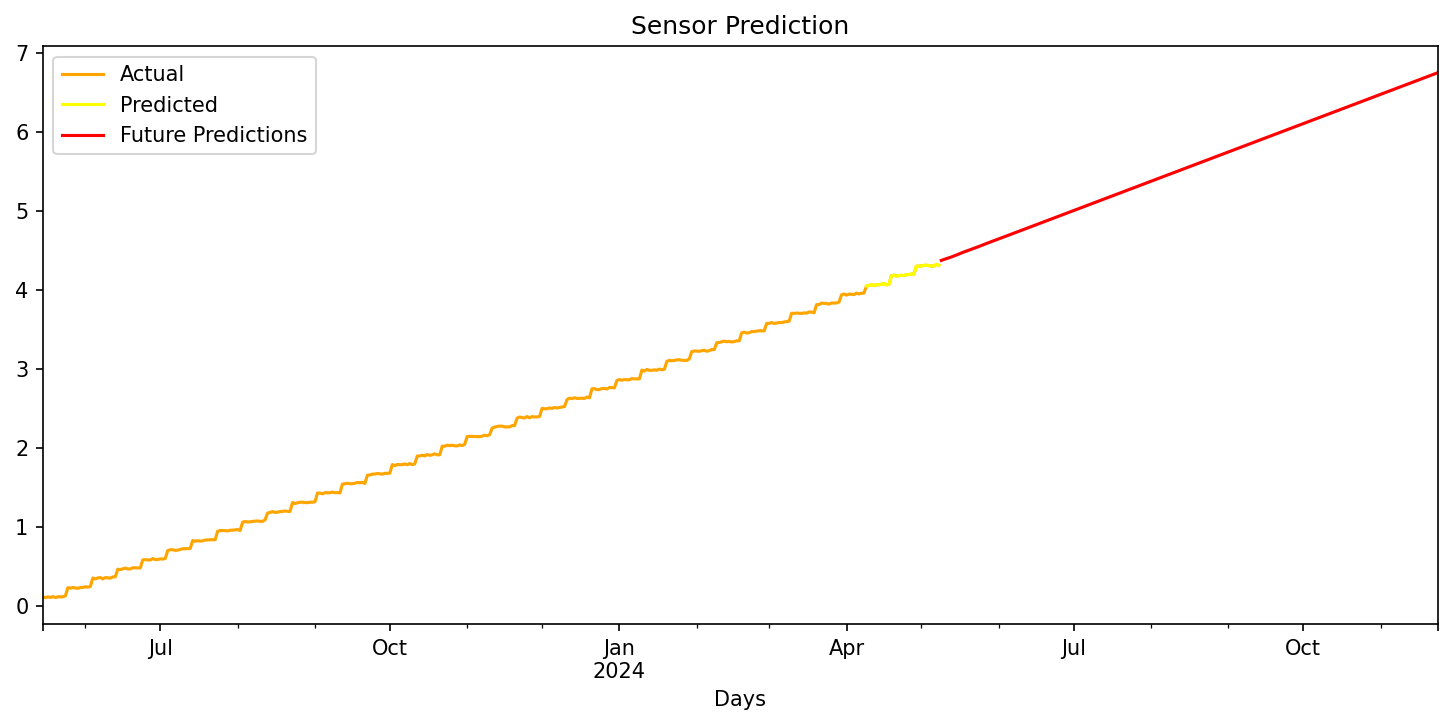

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
ax=data['Rise'].plot(label='Actual', color='orange',figsize=(12, 5))
test['Rise'].plot(ax=ax,label='Predicted',color='Yellow',figsize=(12, 5))
forecast_df['Rise'].plot(ax=ax,label='Future Predictions',color='Red',figsize=(12, 5))
  
# adding title to the plot
plt.title('Sensor Prediction')
  
# adding Label to the x-axis
plt.xlabel('Days')
  
# adding legend to the curve
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected=test['Rise']
predictions=pred
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.024570


In [ ]:
forecast_df.to_csv('predicted.csv', header=True index=True) 